In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mean_by_years = pd.read_csv('../Predictions/submission_mean_by_years.csv')
rolling_avg = pd.read_csv('../Predictions/submission_rolling_avg.csv')
xgboost = pd.read_csv('../Predictions/submission_xgboost.csv')
random_forest = pd.read_csv('../Predictions/submission_random_forest.csv')
prophet = pd.read_csv('../Predictions/submission_prophet.csv')
sarimax = pd.read_csv('../Predictions/submission_sarimax.csv')

# Sort just in case
mean_by_years.sort_values(by='id')
rolling_avg.sort_values(by='id')
xgboost.sort_values(by='id')
random_forest.sort_values(by='id')
prophet.sort_values(by='id')
sarimax.sort_values(by='id')

# Rename sales columns for each model
mean_by_years = mean_by_years.rename({'sales':'mean_by_years'},axis=1)
rolling_avg = rolling_avg.rename({'sales':'rolling_avg'},axis=1)
xgboost = xgboost.rename({'sales':'xgboost'},axis=1)
random_forest = random_forest.rename({'sales':'random_forest'},axis=1)
prophet = prophet.rename({'sales':'prophet'},axis=1)
sarimax = sarimax.rename({'sales':'sarimax'},axis=1)

In [16]:
all_submissions = pd.merge(mean_by_years, rolling_avg, on='id')
all_submissions = pd.merge(all_submissions,xgboost,on='id')
all_submissions = pd.merge(all_submissions,random_forest,on='id')
all_submissions = pd.merge(all_submissions,prophet,on='id')
all_submissions = pd.merge(all_submissions,sarimax,on='id')
all_submissions

,id,mean_by_years,rolling_avg,xgboost,random_forest,prophet,sarimax
0,3000888,3.1000,4.965517,5.150004,2.780000,4.643406,4.384954
1,3000889,0.0000,0.000000,0.000003,0.000000,0.000000,0.000000
2,3000890,2.4000,3.310345,5.657823,6.200000,6.417149,6.343135
3,3000891,1915.7000,2060.068966,2565.031903,2536.290000,2310.096747,2264.613971
4,3000892,0.0000,0.034483,0.082563,0.080000,0.452525,0.067759
...,...,...,...,...,...,...,...
28507,3029395,390.4212,437.880281,320.287099,321.461038,337.873128,226.134574
28508,3029396,90.4535,120.867428,138.182761,100.778790,115.803888,105.270215
28509,3029397,882.6474,1606.105500,663.876308,1221.725300,1384.561281,1311.292960
28510,3029398,16.4000,150.071429,41.371271,86.140000,132.045618,140.092297


## Set weights

In [85]:
weight_mean_by_years = 0
weight_rolling = 2/4
weight_xgboost = 0
weight_random_forest = 0
weight_prophet = 1/4
weight_sarimax = 1/4

## Generate submission

In [86]:
all_submissions['sales'] = (
    weight_mean_by_years*all_submissions['mean_by_years'] + 
    weight_rolling*all_submissions['rolling_avg'] +
    weight_xgboost*all_submissions['xgboost'] +
    weight_random_forest*all_submissions['random_forest'] +
    weight_prophet*all_submissions['prophet'] +
    weight_sarimax*all_submissions['sarimax']
)
all_submissions

,id,mean_by_years,rolling_avg,xgboost,random_forest,prophet,sarimax,sales
0,3000888,3.1000,4.965517,5.150004,2.780000,4.643406,4.384954,4.739849
1,3000889,0.0000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000
2,3000890,2.4000,3.310345,5.657823,6.200000,6.417149,6.343135,4.845244
3,3000891,1915.7000,2060.068966,2565.031903,2536.290000,2310.096747,2264.613971,2173.712162
4,3000892,0.0000,0.034483,0.082563,0.080000,0.452525,0.067759,0.147312
...,...,...,...,...,...,...,...,...
28507,3029395,390.4212,437.880281,320.287099,321.461038,337.873128,226.134574,359.942066
28508,3029396,90.4535,120.867428,138.182761,100.778790,115.803888,105.270215,115.702240
28509,3029397,882.6474,1606.105500,663.876308,1221.725300,1384.561281,1311.292960,1477.016310
28510,3029398,16.4000,150.071429,41.371271,86.140000,132.045618,140.092297,143.070193


In [83]:
submission = all_submissions[['id','sales']]

In [87]:
# Run to create submission file
# Naming convention is submission_weighted_ followed by relative weights given to each model
# models are in order of their original scores, so:
# mean_by_year, rolling_avg, xgboost, random_forest, prophet, sarimax
submission.to_csv("../Predictions/submission_weighted_0-2-0-0-1-1.csv", index = False)

| Score | Weights |
|:--------|:--------|
0.42913     |   $\frac{1}{3}\textnormal{Rolling}+\frac{1}{3}\textnormal{Prophet}+\frac{1}{3}\textnormal{SARIMAX}$
0.43367     |   $\frac{3}{6}\textnormal{Rolling}+\frac{1}{6}\textnormal{XGBoost}+\frac{1}{6}\textnormal{Prophet}+\frac{1}{6}\textnormal{SARIMAX}$
0.43367     |   $\frac{2}{4}\textnormal{Rolling}+\frac{1}{4}\textnormal{Prophet}+\frac{1}{4}\textnormal{SARIMAX}$

## Compare predictions

In [77]:
# Set up some date for plotting

# Use to match id columns to original dates
test = pd.read_csv('../../Data/competition_data/test.csv')
test = pd.merge(test, all_submissions,on='id')

# Test dates
dates = pd.Series(pd.date_range(start='8/16/2017', end='8/31/2017',freq='D')).astype('str')
# List of product families
families = test['family'].unique()

# Colors
colors = sns.color_palette("tab10", 6)
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

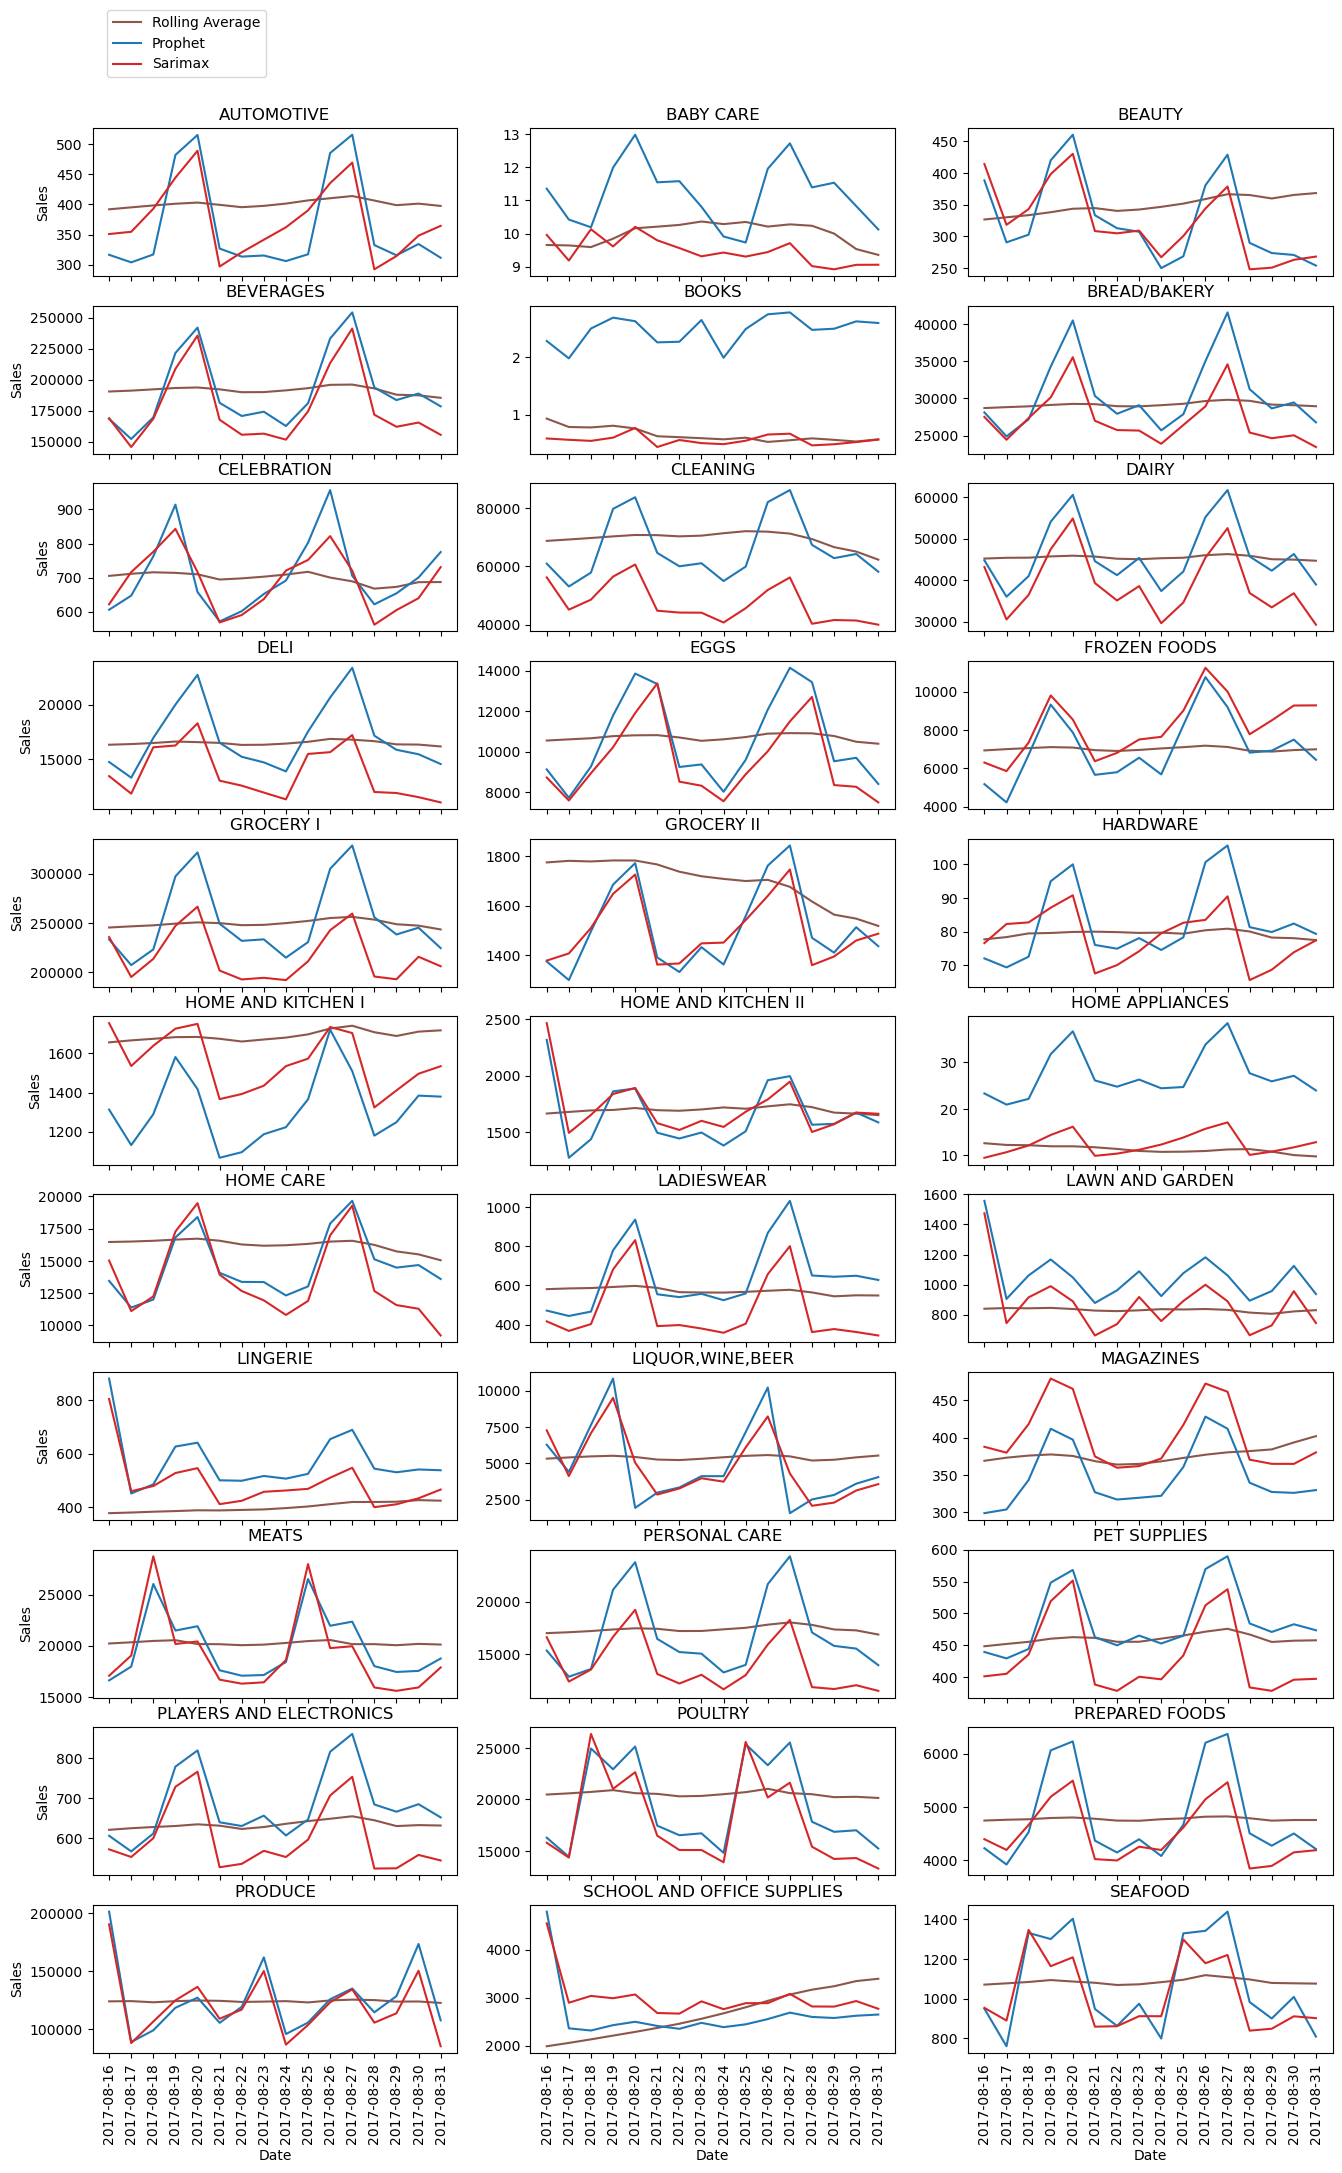

In [107]:
# Plot sales predictions between different models

fig, ax = plt.subplots(nrows=11,ncols=3,figsize=(16,25),sharex=True)

for index,family in enumerate(families):
    # index//3 gives axis row number to plot
    # index%3 gives axis column number to plot
    
    if index!=32:
        # Comment in/out models to compare them.
        #ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').mean_by_years.sum(),color=colors[4])
        ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').rolling_avg.sum(),color=colors[5])
        #ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').xgboost.sum(),color=colors[1])
        #ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').random_forest.sum(), color=colors[2])
        ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').prophet.sum(),color=colors[0])
        ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').sarimax.sum(),color=colors[3])
    else:
        #ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').mean_by_years.sum(),label='Mean by Year',color=colors[4])
        ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').rolling_avg.sum(),label='Rolling Average',color=colors[5])
        #ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').xgboost.sum(),label='XGBoost',color=colors[1])
        #ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').random_forest.sum(),label='Random Forest', color=colors[2])
        ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').prophet.sum(),label='Prophet',color=colors[0])
        ax[index//3,index%3].plot(dates,test[ test['family']==family].groupby('date').sarimax.sum(),label='Sarimax',color=colors[3])
    
    # Customize plot
    ax[index//3,index%3].set_title(f'{family}')
    if (index//3)==10:
        ax[index//3,index%3].set_xlabel('Date')
        ax[index//3,index%3].set_xticks(ticks=dates,labels=dates, rotation=90)
    if (index%3)==0:
        ax[index//3,index%3].set_ylabel('Sales')

fig.legend(loc='upper left', bbox_to_anchor=(0.13, 0.93))
plt.show()